# Analysis

In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(10,7)})
plt.style.use('seaborn-whitegrid')

In [295]:
year = '11'

### Systematic errors?

–ø—Ä–æ—Å—Ç–æ —Ñ–ª–∞–≥, —á—Ç–æ–± –æ—Ç–¥–µ–ª—å–Ω–æ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç

In [296]:
sys_err = True

## Data preparation


–ü—Ä–∏–º–µ—Ä —Å `open`
```python
f = uproot.open("../outputs/19/trees/550.00_70260.root")
f['t'].pandas.df()
```

In [297]:
f = uproot.pandas.iterate("../outputs/"+year+"/trees/*.root", "t", reportpath = True,
                          branches=['beam_energy', 'mass', 'trigger', 'procedure'])

In [298]:
dataRAW = pd.concat([j.assign(name=float(re.findall(r"\d+\.\d+", path)[0])) for path,j in f])

In [299]:
dataRAW.shape

(4386, 5)

In [300]:
dataRAW.sort_values(by='name', ascending=True, inplace=True);

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö `name` –≤ `data` –¥–æ–ª–∂–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç–æ—á–µ–∫ –≤ —Å–µ–∑–æ–Ω–µ

* 11 –≥–æ–¥: 40 —Ç–æ—á–µ–∫
* 12 –≥–æ–¥: 16 —Ç–æ—á–µ–∫
* 17 –≥–æ–¥: 34 —Ç–æ—á–∫–∏
* 19 –≥–æ–¥: 44 —Ç–æ—á–∫–∏
* –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ: 38 —Ç–æ—á–µ–∫

In [301]:
print("Checking:", len(dataRAW.name.unique()), 'different names in', year, 'season')

Checking: 40 different names in 11 season


–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ç–∏–ø–æ–≤ –ø–æ–ª–µ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [302]:
dataRAW.dtypes

beam_energy    float64
mass           float64
trigger          int32
procedure        int32
name           float64
dtype: object

–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [303]:
dataRAW.describe()

beam_energy         mass      trigger  procedure         name
count  4386.000000  4386.000000  4386.000000     4386.0  4386.000000
mean    609.991556   471.537126     0.863885        2.0   611.063041
std     114.674315   107.775536     0.916557        0.0   115.005342
min     523.580017     1.590631    -1.000000        2.0   525.000000
25%     537.409973   492.431770     0.000000        2.0   537.500000
50%     562.133972   496.916153     1.000000        2.0   562.500000
75%     636.390015   500.977554     2.000000        2.0   637.500000
max    1002.309998   577.198242     2.000000        2.0  1000.000000

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç—Ä–∏–≥–≥–µ—Ä

In [304]:
bad_trig = dataRAW.query('trigger<0')
print('Energy points with bad trigger:\n', bad_trig.name.value_counts())

Energy points with bad trigger:
 525.0    18
Name: name, dtype: int64


–ü—Ä–æ–≤–µ—Ä–∏—Ç—å —ç–Ω–µ—Ä–≥–∏–∏

In [305]:
bad_en = dataRAW.query('beam_energy<0')
print('Bad energy records:', bad_en.name.shape[0])

Bad energy records: 0


–£–¥–∞–ª–∏—Ç—å —Å–æ–±—ã—Ç–∏—è —Å –ø–ª–æ—Ö–∏–º —Ç—Ä–∏–≥–≥–µ—Ä–æ–º –∏ —ç–Ω–µ—Ä–≥–∏—è–º–∏ (–Ω–µ –≤ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏)

In [306]:
data = dataRAW if 'model' in year else dataRAW.query('trigger>-1&beam_energy>0')

–û—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ –º–∞—Å—Å—ã –≤–Ω—É—Ç—Ä–∏ –æ–∫–Ω–∞ (450,550) –∏ –±–µ–∑ –ø—Ä–æ—Ü–µ–¥—É—Ä—ã kinfit

In [307]:
data = data.query('mass>450&mass<550&procedure!=1')

In [308]:
print(data.shape[0], 'records left')

4045 records left


–£–¥–∞–ª–∏—Ç—å –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [309]:
data.drop(['procedure'], axis=1, inplace=True)

In [310]:
data.head()

beam_energy        mass  trigger   name
666   523.580017  502.045563        1  525.0
581   523.580017  497.077087        0  525.0
582   523.580017  491.056458        1  525.0
583   523.580017  504.232819        1  525.0
584   523.580017  498.035065        1  525.0

–î–æ–±–∞–≤–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏

In [311]:
lum = pd.read_csv(f'../inputs/{year}/lum.dat')
lum.rename({'label': 'name'}, axis=1, inplace=True)
if 'err' in lum.columns:
    lum.drop(['err'], axis=1, inplace=True) #–æ—à–∏–±–∫–∞ —Å–≤–µ—Ç–∏–º–æ—Å—Ç–µ–π —É—Ö–æ–¥–∏—Ç –≤ —Å–∏—Å—Ç–µ–º–∞—Ç–∏–∫—É
    
lum = lum.sort_values(by='name').drop_duplicates(subset=['name'])

In [312]:
lum.tail()

name      lum
17   950.0  498.580
18   962.5  590.841
19   975.0  451.026
20   987.5  506.605
21  1000.0  478.093

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –¥–∞–Ω–Ω—ã–µ (—Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ —á–∏—Å–ª–∞ —Å–æ–≤–ø–∞–¥–∞—é—Ç)

–ï—Å–ª–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç, —Ç–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã

In [313]:
print('Records in  lum:', lum.shape[0])
print('Records in data:', data.name.unique().shape[0])

Records in  lum: 40
Records in data: 40


–û–±—ä–µ–¥–∏–Ω–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ —Å–≤–µ—Ç–∏–º–æ—Å—Ç—å

In [314]:
data_prep = lum.merge(data, on='name')

In [315]:
def check_foo(data1, data2):
    if(data1.shape[0] == data2.shape[0]):
        print("Good.", data1.shape[0], 'rows' )
    else:
        print("WARNING. frames haven't equal shape |", data1.shape[0], 'vs', data2.shape[0], 'records')
    return

In [316]:
check_foo(data_prep, data)

Good. 4045 rows


–°–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö –∏–º–µ–Ω–Ω–æ —Ç–æ—á–∫–∞—Ö –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç `data` –∏ `lum`

In [317]:
set1 = set(data.name.unique())
set2 = set(lum.name.unique())

(set1|set2).difference(set1&set2)

set()

### Pictures

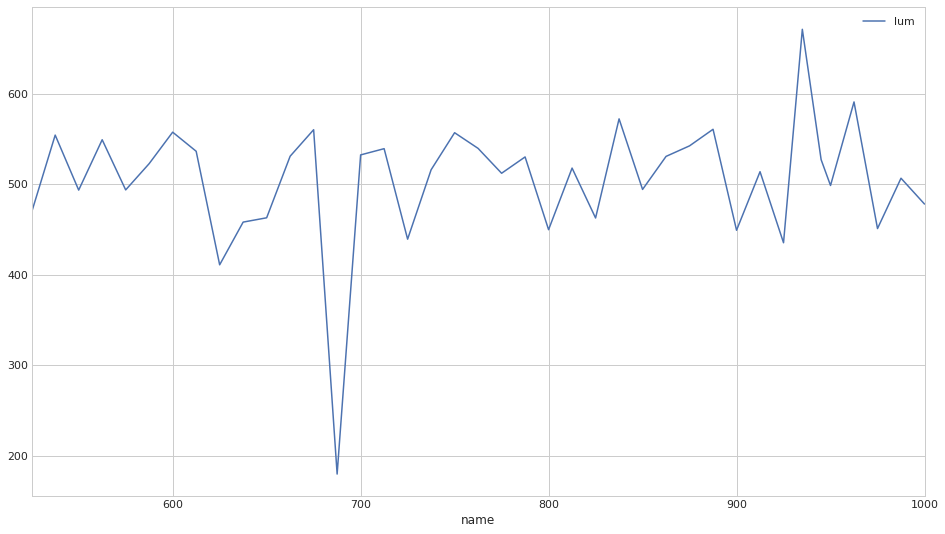

In [318]:
lum.plot(x='name', y='lum')

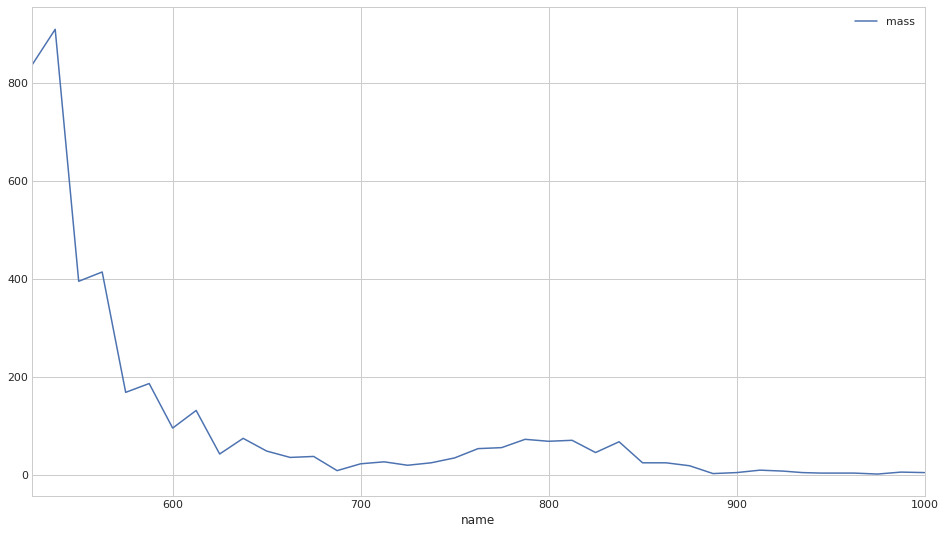

In [319]:
data_prep.groupby('name').agg({'mass':np.size}).plot()

In [320]:
data_prep.groupby('name').agg({'mass':np.size})

mass
name         
525.0   836.0
537.5   910.0
550.0   395.0
562.5   414.0
575.0   168.0
587.5   186.0
600.0    95.0
612.5   131.0
625.0    42.0
637.5    74.0
650.0    48.0
662.5    35.0
675.0    37.0
687.5     8.0
700.0    22.0
712.5    26.0
725.0    19.0
737.5    24.0
750.0    34.0
762.5    53.0
775.0    55.0
787.5    72.0
800.0    68.0
812.5    70.0
825.0    45.0
837.5    67.0
850.0    24.0
862.5    24.0
875.0    18.0
887.5     2.0
900.0     4.0
912.5     9.0
925.0     7.0
935.0     4.0
945.0     3.0
950.0     3.0
962.5     3.0
975.0     1.0
987.5     5.0
1000.0    4.0

–°–ª–∏—è–Ω–∏–µ —Ç–æ—á–µ–∫

In [321]:
cnct = []
if year=='11':
    cnct = [([887.5, 900., 912.5, 925., 935.], 910), ([945., 950., 962.5, 975., 987.5, 1000.], 950)] #11year
if year=='12':
    cnct = [([900., 920., 936.], 920), ([950., 960., 970.,], 950), ([ 980., 990], 960)] #12 year
if year=='17':
    cnct = [([880., 890.], 885), ([900., 910.], 905), ([920., 930.], 925),
           ([937.4, 937.5, 938.3, 938.9, 939.6, 940.2, 940.8], 939)] #17 year
#     cnct = [([880., 890., 900., 910.], 900), ([920., 930., 936., 937.5], 935),
#             ([937.4, 938.3, 938.9], 938), ([939.6, 940.2, 940.8], 940),
#             ([942., 950., 960., 971.], 960), ([981., 990, 1003.5],990)] #17 year
# if year=='19': #–≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Ä–∞–∑ –Ω–µ —Å–ª–∏–≤–∞–ª —Ç–æ—á–∫–∏
#     cnct = [([862.5, 875.0, 887.5, 900.0, 912.5, 925], 875),([936, 945.0, 950.0, 951.1, 955.0, 962.5], 955),
#             ([975., 978.0, 987.5], 980)] #19year

In [322]:
for c in cnct:
    data_prep.name.replace(c[0], c[1], inplace=True)

OK, points have been merged

In [323]:
data_prep.tail()

name      lum  beam_energy        mass  trigger
4040  950.0  506.605   989.221008  527.203430        2
4041  950.0  478.093  1002.309998  498.673920        0
4042  950.0  478.093  1002.309998  494.471771        0
4043  950.0  478.093  1002.309998  481.866150        0
4044  950.0  478.093  1002.309998  496.517883        0

In [324]:
check_foo(data_prep, data)

Good. 4045 rows


### –ü–µ—Ä–µ—Å—á–∏—Ç–∞—Ç—å —Å–≤–µ—Ç–∏–º–æ—Å—Ç–∏ –≤ —Å–ª–∏—Ç—ã—Ö —Ç–æ—á–∫–∞—Ö

In [325]:
data_prep['lume'] = data_prep.beam_energy*data_prep.lum

–ü—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å —Å–ª–∏—è–Ω–∏—è

In [326]:
#—á–∏—Å–ª–æ –≤ –ø–æ–ª–µ lum —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ —Å–ø–∏—Å–∫–µ –¥–ª—è —Å–ª–∏—è–Ω–∏—è
data_prep[['lum', 'name']].\
drop_duplicates(subset=['name','lum']).groupby('name').agg({'lum':np.size}).query('lum!=1')

lum
name      
910.0  5.0
950.0  6.0

In [327]:
new_lum = data_prep[['beam_energy', 'lum', 'lume', 'name']].drop_duplicates(subset=['lum','name']).\
groupby('name').agg({'lume':[np.sum], 'lum':[np.sum], 'beam_energy':[np.min, np.max]})

In [328]:
new_lum.shape

(31, 4)

In [329]:
new_lum['Emean'] = np.round( new_lum[('lume','sum')]/new_lum[('lum','sum')], 2)

In [330]:
new_lum.columns = ['lume', 'lum', 'dEmin', 'dEmax', 'Emean']
new_lum.drop('lume', axis=1, inplace=True)
new_lum['dEmax'] = np.abs( np.round( new_lum.dEmax-new_lum.Emean, 2) )
new_lum['dEmin'] = np.abs( np.round( new_lum.Emean - new_lum.dEmin, 2) )

In [331]:
#data.loc[641.].beam_energy.std()

In [332]:
new_lum.query('dEmin>0')

lum  dEmin  dEmax   Emean
name                                 
910.0  2630.015  25.42  23.31  912.28
950.0  3052.256  24.05  31.56  970.75

I have got new luminosity table.

Now I should join it to existing table

In [333]:
data_prep.drop(['lume', 'lum', 'beam_energy'], axis=1, inplace=True)

In [334]:
final_data = data_prep.join(new_lum, how='inner', on='name')

In [335]:
check_foo(final_data, data_prep)

Good. 4045 rows


That is good. Now I should do the analysis

In [336]:
final_data.tail()

name        mass  trigger       lum  dEmin  dEmax   Emean
4040  950.0  527.203430        2  3052.256  24.05  31.56  970.75
4041  950.0  498.673920        0  3052.256  24.05  31.56  970.75
4042  950.0  494.471771        0  3052.256  24.05  31.56  970.75
4043  950.0  481.866150        0  3052.256  24.05  31.56  970.75
4044  950.0  496.517883        0  3052.256  24.05  31.56  970.75

----------------
## Fit

In [337]:
data2 = final_data.groupby('name')

In [338]:
dic = {}
for i in data2.groups:
    print(i)
    dic[i] = np.array( data2.get_group(i)['mass'] )

525.0
537.5
550.0
562.5
575.0
587.5
600.0
612.5
625.0
637.5
650.0
662.5
675.0
687.5
700.0
712.5
725.0
737.5
750.0
762.5
775.0
787.5
800.0
812.5
825.0
837.5
850.0
862.5
875.0
910.0
950.0


In [339]:
import iminuit
import probfit as pf

In [340]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(16,9)})

In [341]:
mass_bound = (450, 550)

In [342]:
#2 –≥–∞—É—Å—Å–∞
def constant(x):
    return 1
def two_gauss(x, mu, sigma1, sigma2, frac):
    return frac*pf.gaussian(x, mu, sigma1) + (1-frac)*pf.gaussian(x, mu, sigma2)

norm_sig = pf.rename( pf.Normalized( two_gauss, mass_bound ), ['x', 'M', '$\sigma1$', '$\sigma2$', 'f'] )
norm_bkg = pf.Normalized( constant, mass_bound )

ext_sig = pf.Extended(norm_sig, extname='$N_{sig}$')
ext_bkg = pf.Extended(norm_bkg, extname='$N_{bkg}$')

pdf = pf.AddPdf(ext_sig, ext_bkg)

MLim = (498.1, 5.0)
sigma1Lim = (6.04, .0)
sigma2Lim = (10., 0)
fLim = (1, 0)

# 11: ùúé1=(4.49, 0.27) , ùúé2=(10.1, 1.), ùëì=(0.68, 0.07), M=(497.299, 0.098)
# 12: ùúé1=(5.26, 0.30) , ùúé2=(14.42, 3.87), ùëì=(0.86, 0.06), M=(498.33, 0.27)
# mod_old: ùúé1=(5.43, 0.10) , ùúé2=(12.68, 0.25), ùëì=(0.58, 0.02), M=(497.05, 0.04)
# mod_new: ùúé1=(5.35, 0.07) , ùúé2=(12.74, 0.17), ùëì=(0.57, 0.02), M=(498.00, 0.03)
limits = {
    "limit_M": [MLim[0]-MLim[1], MLim[0]+MLim[1]],
    "limit_$\sigma1$": [sigma1Lim[0] - sigma1Lim[1], sigma1Lim[0] + sigma1Lim[1]],
    "limit_$\sigma2$": [sigma2Lim[0] - sigma2Lim[1], sigma2Lim[0] + sigma2Lim[1]],
    "limit_$N_{sig}$": [0, 100000],
    "limit_$N_{bkg}$": [0, 2000],
    "limit_f": [fLim[0]-fLim[1], fLim[0]+fLim[1]]
}
errors = {
    "error_M": 1,
    "error_$\sigma1$": 0.1,
    "error_$\sigma2$": 0.,
    "error_$N_{sig}$": 0.3,
    "error_$N_{bkg}$": 0.1,
    "error_f": 0.
}

pf.describe(pdf)

['x', 'M', '$\\sigma1$', '$\\sigma2$', 'f', '$N_{sig}$', '$N_{bkg}$']

In [343]:
def fitter(dic, nbins, energy, binnedLik=False, simple_plot=True):
    
    likelihood = pf.UnbinnedLH(pdf, dic, extended=True, extended_bound=mass_bound) if not(binnedLik) else \
    pf.BinnedLH(pdf, dic, int(nbins*(mass_bound[1]-mass_bound[0])/100.), bound=mass_bound, extended=True)
    
    initial_par_values = {"M": 497.6, "$\sigma1$": 4.26, "$N_{sig}$": np.size(dic),
                          "$\sigma2$": 11.16, "f": 0.5, "$N_{bkg}$": 1}
    mt = iminuit.Minuit(likelihood, **initial_par_values, **errors, **limits, pedantic=False)
    mt.migrad();
        
    if simple_plot:
        likelihood.draw(minuit=mt) if binnedLik else likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)
    else:
        fig = plt.figure(figsize=(16, 10), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

        # Define the axes
        ax_main = fig.add_subplot(grid[:-1, :])
        ax_main.grid(ls=':')
        box_1 = {'facecolor':'black', 'boxstyle': 'round'}

        if binnedLik:
            likelihood.draw(minuit=mt, print_par=True);
        else:
            likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound, print_par=True)

        plt.tick_params(labelsize=20);
        plt.xlabel('invariant mass, MeV', fontsize=20)
        plt.ylabel('number of events', fontsize=20)

        # this is an inset axes over the main axes
        ax_bottom = fig.add_subplot(grid[-1, :], xticklabels=[])
        ax_bottom.grid(ls=':')
        likelihood.draw_residual(minuit=mt) if binnedLik else \
        likelihood.draw_residual(minuit=mt, bins=nbins, bound=mass_bound)
    
        plt.savefig(f'../outputs/{year}/figures/fit_e{energy}.pdf')
    return mt, likelihood

In [344]:
itr = iter(dic)

In [345]:
fit_frame = pd.DataFrame(columns=[ 'M', 'S1', 'S2', 'f', 'N', 'C', 
                                  'Merr', 'S1err', 'S2err', 'ferr', 'Nerr', 'Cerr'])

In [346]:
i = next(itr)
print('Label:', i)

Label: 525.0


Migrad quality: True
Real: 836 Found: 836.0054286041557


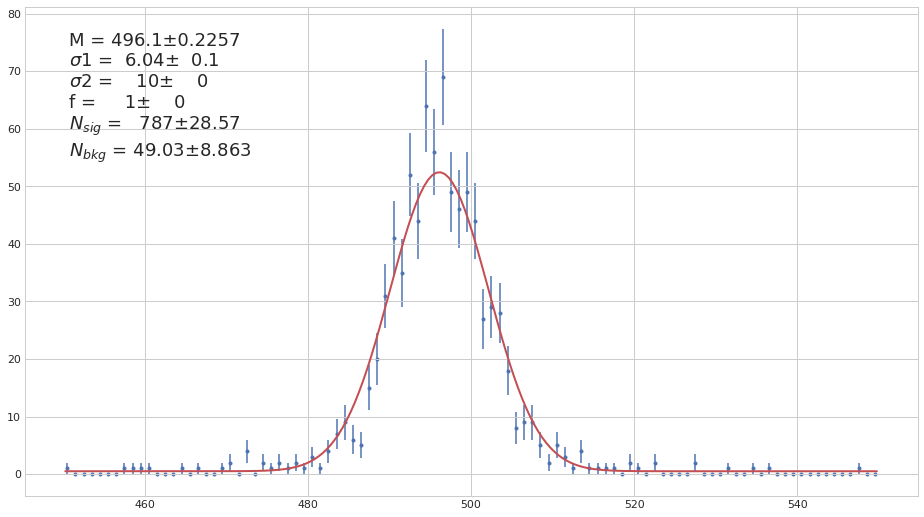

In [347]:
dicx = dic[i]#final_data.mass.values#dic[i]#
# dicx = np.hstack((dic[875],dic[910],dic[950]))
mt, lik = fitter(dicx, 100, i, False, True)
fit_frame.loc[i] = mt.values.values() + mt.errors.values()
print("Migrad quality:", mt.migrad_ok())
print( 'Real:', np.size(dicx), 'Found:', mt.values['$N_{sig}$'] + mt.values['$N_{bkg}$'] )

In [274]:
fit_frame.tail(20)

M        S1    S2    f          N             C      Merr  \
662.5  496.502797  5.070046  10.0  1.0  30.150779  4.842622e+00  1.049064   
675.0  498.855054  6.837100  10.0  1.0  33.916928  3.084747e+00  1.197280   
687.5  494.194402  5.530817  10.0  1.0   8.003128  1.499773e-05  1.825268   
700.0  496.427335  6.570705  10.0  1.0  22.009304  6.983236e-06  1.380516   
712.5  498.371608  3.120000  10.0  1.0  17.406835  8.591570e+00  0.814112   
725.0  500.540535  8.375486  10.0  1.0  17.113065  1.888469e+00  2.072845   
737.5  496.189686  4.504685  10.0  1.0  17.843186  6.144986e+00  1.252980   
750.0  497.295198  6.363604  10.0  1.0  30.011817  4.011050e+00  1.256347   
762.5  497.192153  6.292578  10.0  1.0  49.430592  3.572403e+00  0.950087   
775.0  497.963025  6.999877  10.0  1.0  48.520963  6.479034e+00  1.084347   
787.5  498.037731  6.899358  10.0  1.0  65.529038  6.492713e+00  0.917806   
800.0  497.458355  7.496186  10.0  1.0  60.482765  7.522521e+00  1.061082   
812.5  499.762441  8.277766  10.0  1.0  70.000046  4.433121e-10  0.982120   
825.0  495.101838  7.732671  10.0  1.0  42.599191  2.393035e+00  1.250125   
837.5  497.622746  7.023193  10.0  1.0  54.301747  1.269286e+01  1.267349   
850.0  496.962935  5.697092  10.0  1.0  21.106354  2.919217e+00  1.285715   
862.5  495.893506  8.576654  10.0  1.0  16.026670  7.960795e+00  2.571397   
875.0  499.939285  4.959328  10.0  1.0  14.083435  3.918250e+00  1.364037   
910.0  497.430621  6.165328  10.0  1.0  16.062441  9.901480e+00  1.855135   
950.0  497.490134  6.040000  10.0  1.0   8.083615  1.091586e+01  2.833305   

          S1err  S2err  ferr      Nerr      Cerr  
662.5  0.880969    0.0   0.0  5.769197  2.824352  
675.0  0.848688    0.0   0.0  5.963990  2.176449  
687.5  1.357017    0.0   0.0  2.829253  0.723464  
700.0  0.982874    0.0   0.0  4.691897  0.750221  
712.5  0.189859    0.0   0.0  4.314992  3.130795  
725.0  1.536532    0.0   0.0  4.337617  1.894288  
737.5  1.106479    0.0   0.0  4.561804  3.017955  
750.0  1.140991    0.0   0.0  5.793014  2.748146  
762.5  0.739949    0.0   0.0  7.228767  2.528741  
775.0  0.912207    0.0   0.0  7.366914  3.498018  
787.5  0.833110    0.0   0.0  8.497578  3.630144  
800.0  1.068830    0.0   0.0  8.447098  4.288945  
812.5  0.697321    0.0   0.0  8.366591  0.930653  
825.0  1.009489    0.0   0.0  6.760244  2.344376  
837.5  1.207081    0.0   0.0  8.363514  5.322304  
850.0  0.927474    0.0   0.0  4.739335  2.062172  
862.5  2.319629    0.0   0.0  4.834911  3.911313  
875.0  0.944497    0.0   0.0  3.905737  2.257718  
910.0  1.524107    0.0   0.0  4.578415  3.847897  
950.0  0.100000    0.0   0.0  3.500607  3.883645

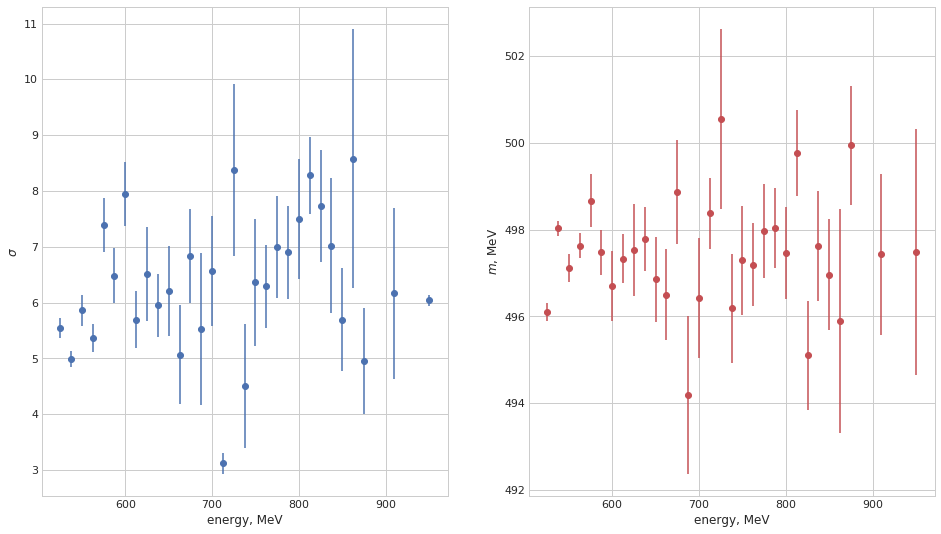

In [273]:
plt.subplot(1, 2, 1)
plt.errorbar(data=fit_frame, x=fit_frame.index, y='S1', yerr='S1err', fmt='o')
plt.xlabel('energy, MeV');
plt.ylabel('$\\sigma$');
plt.subplot(1, 2, 2)

plt.errorbar(x=fit_frame.index, y=fit_frame.M, yerr=fit_frame.Merr, fmt='or')
plt.xlabel('energy, MeV');
plt.ylabel('$m$, MeV');

### Some notes:
none

## –ê–Ω–∞–ª–∏–∑ $\sigma$

### 19 –≥–æ–¥

–í —Ç–æ—á–∫–∞—Ö 550 –∏ 550.1 –ø—Ä–∏–Ω—Ü–∏–ø–∏–∞–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è —à–∏—Ä–∏–Ω–∞ ( 4.8 vs 6.12 )

–í 19 –≥–æ–¥—É –≤–∑—è–ª –≥—Ä—É–ø–ø–∞–º–∏ —Ç–æ—á–∫–∏ –ø–æ —ç–Ω–µ—Ä–≥–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª –∏—Ö $\sigma$, –≤–∏–¥–Ω–æ, —á—Ç–æ —à–∏—Ä–∏–Ω–∞ —Ä–∞—Å—Ç—ë—Ç –≤–º–µ—Å—Ç–µ —Å —ç–Ω–µ—Ä–≥–∏–µ–π

In [634]:
np.round(fit_frame.S1err.values, 2)

array([0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25])

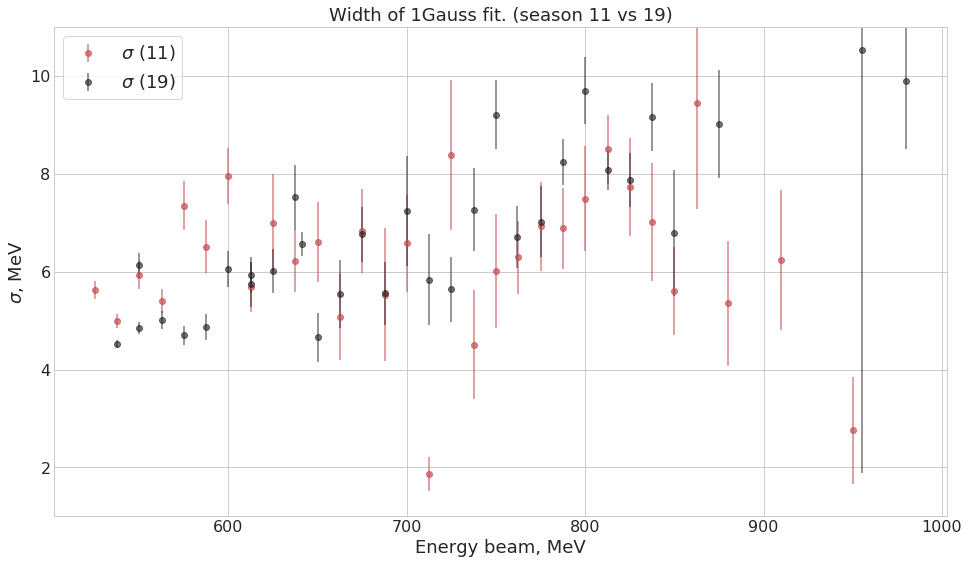

In [651]:
en19_an  = [537.5, 550. , 550.1, 562.5, 575. , 587.5, 600. , 612.5, 612.6,
       625. , 637.5, 641. , 650. , 662.5, 675. , 687.5, 700. , 712.5,
       725. , 737.5, 750. , 762. , 775. , 787.5, 800. , 812.5, 825. ,
       837.5, 850. , 875. , 955. , 980. ]
sigma19_an = [ 4.52,  4.85,  6.13,  5.01,  4.7 ,  4.87,  6.05,  5.74,  5.93,
        6.02,  7.52,  6.57,  4.66,  5.54,  6.76,  5.56,  7.24,  5.83,
        5.64,  7.27,  9.21,  6.71,  7.02,  8.25,  9.7 ,  8.08,  7.87,
        9.16,  6.79,  9.02, 10.53,  9.9 ]
dsigma19_an = [0.09, 0.13, 0.26, 0.18, 0.19, 0.26, 0.37, 0.46, 0.36, 0.45, 0.67,
       0.24, 0.5 , 0.69, 0.56, 0.64, 1.13, 0.93, 0.66, 0.84, 0.71, 0.63,
       0.73, 0.47, 0.69, 0.41, 0.55, 0.7 , 1.28, 1.1 , 8.64, 1.39]

enMC_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMC_an = [5.5 , 5.87, 5.98, 6.3 , 6.23, 6.79, 6.33, 7.3 , 7.29, 7.54, 7.32,
       7.12, 7.39, 7.85, 7.59, 7.94, 7.64, 8.14, 7.99, 8.52, 8.4 , 8.44,
       8.51, 8.3 , 8.73, 8.77, 8.87, 8.3 , 8.95, 8.55, 9.21, 8.9 , 9.25,
       8.94, 9.4 , 9.67, 8.87, 8.95]
dsigmaMC_an = [0.12, 0.15, 0.17, 0.17, 0.21, 0.2 , 0.25, 0.29, 0.26, 0.34, 0.27,
       0.24, 0.32, 0.27, 0.33, 0.27, 0.23, 0.24, 0.23, 0.2 , 0.19, 0.18,
       0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.23, 0.28, 0.24, 0.3 ,
       0.26, 0.29, 0.37, 0.36, 0.36]

enMCold_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
sigmaMCold_an = [ 5.85,  6.39,  6.24,  6.99,  6.54,  6.85,  6.17,  7.27,  7.29,
        7.7 ,  7.3 ,  7.76,  7.34,  7.22,  7.45,  7.84,  8.52,  8.05,
        8.02,  8.09,  8.5 ,  8.39,  8.54,  8.37,  9.37,  8.94,  9.12,
        8.72,  8.85,  8.73,  8.95,  9.16,  8.8 ,  9.12, 10.23,  9.56,
        9.83, 10.53]
dsigmaMCold_an = [0.13, 0.16, 0.16, 0.18, 0.19, 0.25, 0.21, 0.23, 0.26, 0.28, 0.31,
       0.31, 0.31, 0.32, 0.32, 0.3 , 0.31, 0.29, 0.25, 0.25, 0.21, 0.2 ,
       0.21, 0.2 , 0.2 , 0.21, 0.24, 0.27, 0.31, 0.47, 0.44, 0.42, 0.59,
       0.55, 0.56, 0.66, 0.75, 0.25]

en11_an = [525. , 537.5, 550. , 562.5, 575. , 587.5, 600. , 612.5, 625. ,
       637.5, 650. , 662.5, 675. , 687.5, 700. , 712.5, 725. , 737.5,
       750. , 762.5, 775. , 787.5, 800. , 812.5, 825. , 837.5, 850. ,
       862.5, 880. , 910. , 950. ]
sigma11_an = [5.63, 4.99, 5.93, 5.4 , 7.35, 6.51, 7.95, 5.69, 6.99, 6.22, 6.6 ,
       5.07, 6.83, 5.53, 6.58, 1.87, 8.38, 4.51, 6.01, 6.29, 6.93, 6.89,
       7.49, 8.5 , 7.73, 7.02, 5.61, 9.45, 5.35, 6.24, 2.76]
dsigma11_an = [0.18, 0.15, 0.28, 0.25, 0.5 , 0.54, 0.57, 0.51, 1.01, 0.63, 0.82,
       0.88, 0.85, 1.36, 0.99, 0.35, 1.53, 1.12, 1.16, 0.74, 0.91, 0.83,
       1.07, 0.7 , 1.01, 1.21, 0.9 , 2.16, 1.27, 1.43, 1.09]

df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma':sigma_an, 'ds': dsigma_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
# plt.errorbar(x=enMC_an, y=sigmaMC_an, yerr=dsigmaMC_an, fmt='o', alpha=0.8, label='$\sigma$ (MC)')
# plt.errorbar(x=enMCold_an, y=sigmaMCold_an, yerr=dsigmaMCold_an, alpha=0.8, fmt='oc', label='$\sigma$ (MC_old)')
plt.errorbar(x=en11_an, y=sigma11_an, yerr=dsigma11_an, fmt='or', alpha=0.7, label='$\sigma$ (11)')
plt.errorbar(x=en19_an, y=sigma19_an, yerr=dsigma19_an, fmt='ok', alpha=0.6, label='$\sigma$ (19)')
plt.legend(fontsize=18, frameon=True);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylim(1, 11)
plt.xlabel('Energy beam, MeV', fontsize=18);
plt.ylabel('$\sigma$, MeV', fontsize=18);
plt.title('Width of 1Gauss fit. (season 11 vs 19)', fontsize=18);
plt.savefig('sigma3.pdf')

–í–æ–∑–Ω–∏–∫–∞–µ—Ç –≥–∏–ø–æ—Ç–µ–∑–∞ (–µ—â—ë –∏ —Å —É—á—ë—Ç–æ–º —Ç–æ–≥–æ —Ñ–∞–∫—Ç–∞, —á—Ç–æ –Ω–∞ –±–æ–ª—å—à–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ –¥–∞–Ω–Ω—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ) –¥–æ–±–∞–≤–∏—Ç—å –µ—â—ë –æ–¥–∏–Ω –≥–∞—É—Å—Å. –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —ç—Ç–æ–≥–æ –≤—ã–π–¥–µ—Ç.

–ü–æ–≤—Ç–æ—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∏–≥–º –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å –∫–∞—Ä—Ç–∏–Ω–∫–æ–π –≤—ã—à–µ

<ErrorbarContainer object of 3 artists>

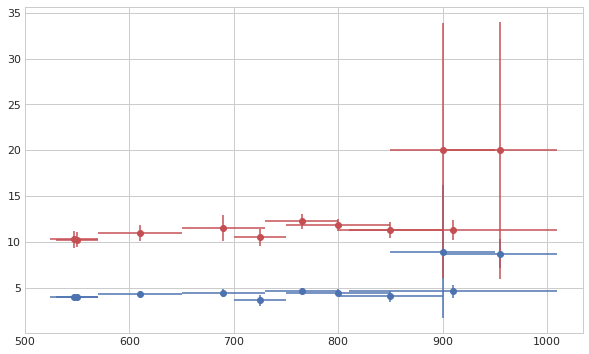

In [552]:
plt.rcParams.update({'font.size': 18, 'figure.figsize':(10,6)})
emin_an  = [524, 570, 650, 730, 800, 900, 850, 750, 700, 530, 810]
emax_an  = [570, 650, 730, 800, 900, 1010, 950, 850, 750, 570, 1010]
sigma1_an = [4.02, 4.31, 4.44, 4.66, 4.08, 8.724847949065675, 8.952093654550044, 4.509152675111134, 3.6841658856535178, 4.01709961911671, 4.628942053127934]
dsigma1_an = [0.13, 0.18, 0.44, 0.39, 0.55, 1.590062670581002, 7.270944904440277, 0.3453623743108212, 0.6048651400716212, 0.1190920659859942, 0.7016815273028718]
sigma2_an = [10.3, 10.98, 11.55, 12.25, 11.34, 19.995900427431625, 19.999882612152, 11.866375420268561, 10.53279261428423, 10.283255759137344, 11.339313291171166]
dsigma2_an = [0.9, 0.85, 1.42, 0.81, 0.89, 13.996992016425061, 13.933962567163773, 0.6617076556061905, 0.9474962757272731, 0.8289418695468278, 1.1023824322696134]
frac12_an = [3.92, 2.31, 1.76, 0.88, 0.64, 2.728843351319719, 6.911293728105318, 0.8379169741736125, 0.7006647553677061, 3.9196405944377877, 0.62839843050261]
df_sigma_an = pd.DataFrame({'emin':emin_an, 'emax':emax_an, 'sigma1':sigma1_an, 'ds1': dsigma1_an, 
                            'sigma2':sigma2_an, 'ds2': dsigma2_an, 'frac': frac12_an})
df_sigma_an['emean'] = (df_sigma_an.emin + df_sigma_an.emax)/2.
df_sigma_an['deup'] = df_sigma_an.emean - df_sigma_an.emin
plt.errorbar(data=df_sigma_an, x='emean', y='sigma1', xerr='deup', yerr='ds1', fmt='ob')
plt.errorbar(data=df_sigma_an, x='emean', y='sigma2', xerr='deup', yerr='ds2', fmt='or')

–í–∏–¥–Ω–æ, —á—Ç–æ –∫–∞–∂–¥–∞—è –∏–∑ —Å–∏–≥–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ —Å–¥–≤–∏–≥–∞–µ—Ç—Å—è. –ù–æ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞ –º–∞–ª–æ–º –æ–±—ä—ë–º–µ –¥–∞–Ω–Ω—ã—Ö —à–∏—Ä–∏–Ω—ã –Ω–∞—á–∏–Ω–∞—é—Ç —Ä–∞—Å–ø–ª—ã–≤–∞—Ç—å—Å—è (–∑–∞–º–µ—Ç–Ω–æ –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö —ç–Ω–µ—Ä–≥–∏—è—Ö)

–ó–∞—Ñ–∏–∫—Å–∏—Ä—É—é —à–∏—Ä–∏–Ω—ã –Ω–∞ —Å—Ä–µ–¥–Ω–∏—Ö –±–µ–∑ —É—á—ë—Ç–∞ –≤—ã–ø–∞–≤—à–∏—Ö —Ç–æ—á–µ–∫

In [238]:
print('Sigma1:', df_sigma_an.drop([5,6]).sigma1.mean() )
print('Sigma2:', df_sigma_an.drop([5,6]).sigma2.mean() )

Sigma1: 4.261040025889923
Sigma2: 11.160193009429035


–¢–æ–≥–¥–∞ –ø—Ä–æ–≤–µ—Ä—è—é –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ $\sigma$ –≤ —Å–ª—É—á–∞–µ –æ–¥–Ω–æ–≥–æ –≥–∞—É—Å—Å–∞ –º–µ–Ω—è–µ—Ç—Å—è –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –º–µ–Ω—è–µ—Ç—Å—è –¥–æ–ª—è —Å–æ–±—ã—Ç–∏–π –ø–æ–¥ —É–∑–∫–∏–º –∏ —à–∏—Ä–æ–∫–∏–º –≥–∞—É—Å—Å–∞–º–∏ –º–µ–Ω—è–µ—Ç—Å—è —Å —ç–Ω–µ—Ä–≥–∏–µ–π

<ErrorbarContainer object of 3 artists>

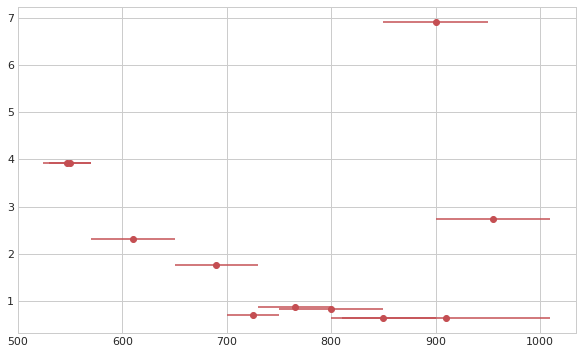

In [314]:
plt.errorbar(data=df_sigma_an, x='emean', y='frac', xerr='deup', fmt='or')

–¢–µ–ø–µ—Ä—å 2 –≥–∞—É—Å—Å–∞ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è (`model_new`)

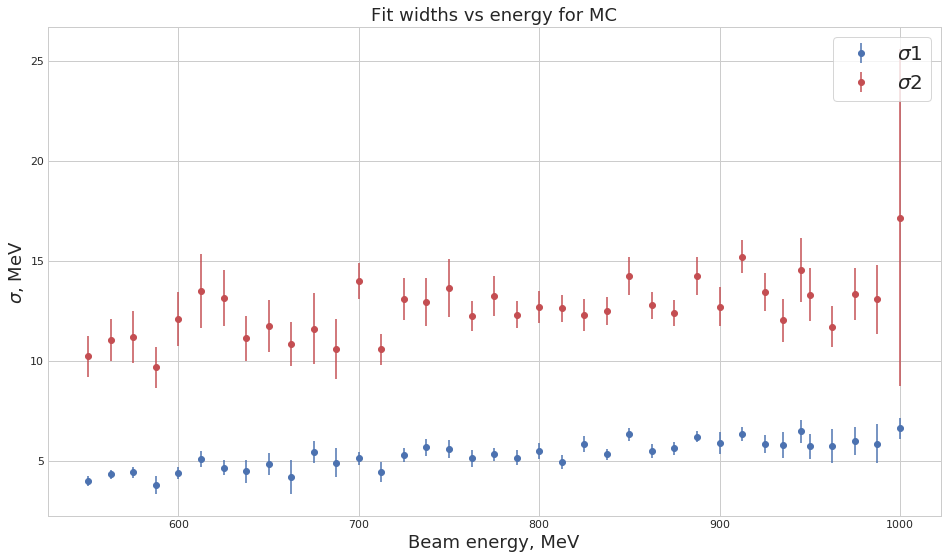

In [194]:
en_an = [ 550. ,  562.5,  575. ,  587.5,  600. ,  612.5,  625. ,  637.5,
        650. ,  662.5,  675. ,  687.5,  700. ,  712.5,  725. ,  737.5,
        750. ,  762.5,  775. ,  787.5,  800. ,  812.5,  825. ,  837.5,
        850. ,  862.5,  875. ,  887.5,  900. ,  912.5,  925. ,  935. ,
        945. ,  950. ,  962.5,  975. ,  987.5, 1000. ]
s1_an = [4.00928888, 4.33747255, 4.43559649, 3.803059  , 4.423181  ,
       5.1014904 , 4.66565474, 4.5045961 , 4.87810257, 4.1960529 ,
       5.43876272, 4.91843674, 5.14132747, 4.45975828, 5.31429813,
       5.69505078, 5.60314509, 5.14196975, 5.3540354 , 5.16952826,
       5.50877517, 4.94773543, 5.86872395, 5.33462472, 6.33305366,
       5.50748813, 5.64094449, 6.22043922, 5.8916277 , 6.35738374,
       5.86313576, 5.82890009, 6.48632741, 5.73844622, 5.75707775,
       6.0104084 , 5.87187928, 6.64138695]
s2_an = [10.24281036, 11.05319352, 11.18820377,  9.68060542, 12.08471558,
       13.48858781, 13.14961493, 11.13335416, 11.74951692, 10.83995468,
       11.62019776, 10.61195066, 13.99189698, 10.58376123, 13.09259816,
       12.95582443, 13.64101323, 12.22498239, 13.24488383, 12.3034521 ,
       12.69676957, 12.62291336, 12.27461984, 12.50987221, 14.22699406,
       12.77836884, 12.39655738, 14.23327043, 12.70892288, 15.21270754,
       13.44290652, 12.03170836, 14.54893378, 13.31082015, 11.72120822,
       13.3503376 , 13.0830581 , 17.15999921]
s1err_an = [0.24420247, 0.23628817, 0.2793554 , 0.43500637, 0.30562574,
       0.41426316, 0.36829545, 0.57240212, 0.55104936, 0.83858414,
       0.54760894, 0.72628265, 0.32523255, 0.51859386, 0.3644784 ,
       0.43592776, 0.44839775, 0.42269701, 0.32609865, 0.3645667 ,
       0.37670574, 0.36108701, 0.38803313, 0.29671017, 0.31075945,
       0.34238496, 0.33784375, 0.2866558 , 0.54865994, 0.35272085,
       0.43615359, 0.64643721, 0.55803832, 0.61537946, 0.86046785,
       0.71916831, 0.972075  , 0.51998215]
s2err_an = [1.02206463, 1.06032287, 1.28551181, 1.00666387, 1.33649728,
       1.83713476, 1.38658335, 1.13404142, 1.28373445, 1.08777375,
       1.78985585, 1.48944632, 0.89674085, 0.7724873 , 1.03681978,
       1.19733482, 1.46254629, 0.7502984 , 0.97471297, 0.6738531 ,
       0.78451445, 0.65602477, 0.80038106, 0.69198662, 0.94256228,
       0.66889848, 0.66153967, 0.94133285, 0.96653921, 0.84317584,
       0.94040895, 1.08274286, 1.57935263, 1.31951827, 1.03343693,
       1.29964889, 1.72233654, 8.39968307]
plt.errorbar(x=en_an, y=s1_an, yerr=s1err_an, fmt='ob', label='$\sigma1$')
plt.errorbar(x=en_an, y=s2_an, yerr=s2err_an, fmt='or', label='$\sigma2$')
plt.legend(frameon=True, fontsize=20);
plt.xlabel('Beam energy, MeV', fontsize=18);
plt.title('Fit widths vs energy for MC', fontsize=18)
plt.ylabel('$\sigma$, MeV', fontsize=18);
# plt.savefig('4.pdf')

–ü–æ —Å–∏–≥–º–µ –≤—Å—ë –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ —Ö–æ—Ä–æ—à–æ, –∞ –≤–æ—Ç —Å–ª–µ–¥—É—é—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é —Å–æ–±—ã—Ç–∏–π –≤ –≥–∞—É—Å—Å–∞—Ö —Å–º—É—â–∞–µ—Ç.

–í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –∏–∑-–∑–∞ –∫–∞–∫–∏—Ö-—Ç–æ —Ä–∞–∑–Ω–æ–≥–ª–∞—Å–∏–π –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –≤–µ—Ä–∏—Ç—å, –Ω–æ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ

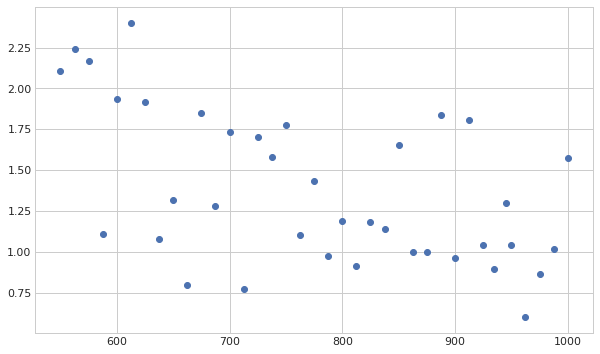

In [554]:
frac_an = [2.1047093 , 2.24281089, 2.16611316, 1.10671026, 1.93781416,
       2.39827954, 1.91504091, 1.07766751, 1.31920011, 0.79416602,
       1.84898383, 1.27802379, 1.73464467, 0.7721512 , 1.70095568,
       1.58280159, 1.77529039, 1.09981627, 1.43251272, 0.97705235,
       1.18825784, 0.9150671 , 1.18416207, 1.14115352, 1.6519543 ,
       0.99945712, 1.00099901, 1.83883042, 0.96433868, 1.8047252 ,
       1.04416522, 0.89545267, 1.29761692, 1.0409458 , 0.60057145,
       0.86444899, 1.01426618, 1.57182104]
plt.scatter(en_an, frac_an)

–°–º—É—â–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –≥–∞—É—Å—Å–æ–≤, –ø–æ—ç—Ç–æ–º—É –∑–∞—Ñ–∏–∫—Å–∏—Ä—É—é –≤—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–∞—É—Å—Å–æ–≤ –∏–∑ –ø–æ–ª–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

$\sigma_1 = 4.178 \pm 0.096$ , $\sigma_2 = 11.06 \pm 0.42$, $ f = 0.67 \pm 0.02$

### 17 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç 
$\sigma_1 = 5.77 \pm 0.56$, $\sigma_2 = 13.44 \pm 2.12$, $f = 0.61 \pm 0.1 $, $M = 498.49 \pm 0.23$

### 11 –≥–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≤—Å–µ–º —Ç–æ—á–∫–∞–º –¥–∞—ë—Ç $\sigma_1 = 4.49 \pm 0.27$ , $\sigma_2 = 10.1 \pm 1.$, $ f = 0.68 \pm 0.07$. 

–Ø –≤–∑—è–ª –¥–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞–∑—Ä–µ—à–∏–ª –∏–º –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ—à–∏–±–∫–∏

### 12 –≥–æ–¥

$\sigma_1 = 5.26 \pm 0.30$ , $\sigma_2 = 14.42 \pm 3.87$, $ f = 0.86 \pm 0.06$, $ M = 498.33 \pm 0.27$

### Model Old

$\sigma_1 = 5.43 \pm 0.10$ , $\sigma_2 = 12.68 \pm 0.25$, $ f = 0.58 \pm 0.02$, $ M = 497.05 \pm 0.04$

# Save fit info

In [276]:
fit_frame.to_csv(f'../outputs/{year}/tables/fit_frame{"_sys" if sys_err else ""}.csv')

In [277]:
#mt.matrix(correlation=True)
#mt.draw_profile('Nsig');

In [278]:
dataN = fit_frame[['N','Nerr']]
dataN.columns = ['Nsig', 'dNsig']
dataN.index.names = ['name']

In [279]:
dataN.tail()

Nsig     dNsig
name                      
850.0  21.106354  4.739335
862.5  16.026670  4.834911
875.0  14.083435  3.905737
910.0  16.062441  4.578415
950.0   8.083615  3.500607

I have got table with events numbers

Now, I will get rid of m-field in the data table (because, I have used it)

In [280]:
data_info = final_data.drop_duplicates(['name','lum']).drop(['mass', 'trigger'], axis=1).set_index('name')

In [281]:
dataN = data_info.join(dataN, how='inner')
dataN

lum  dEmin  dEmax   Emean        Nsig      dNsig
name                                                        
525.0   469.339   0.00   0.00  523.58  779.105080  28.675135
537.5   554.231   0.00   0.00  537.41  877.979011  30.091091
550.0   493.501   0.00   0.00  548.44  376.083144  19.864805
562.5   549.094   0.00   0.00  562.13  384.663283  20.203923
575.0   493.710   0.00   0.00  575.31  158.841076  12.960894
587.5   522.721   0.00   0.00  587.05  174.852337  13.805930
600.0   557.452   0.00   0.00  598.04   95.015190   9.747947
612.5   536.375   0.00   0.00  611.71  119.410919  11.374638
625.0   411.009   0.00   0.00  622.47   40.651600   6.451678
637.5   458.156   0.00   0.00  636.39   70.526549   8.553047
650.0   462.916   0.00   0.00  647.57   45.208730   6.894986
662.5   530.893   0.00   0.00  661.68   30.150779   5.769197
675.0   560.153   0.00   0.00  671.80   33.916928   5.963990
687.5   179.974   0.00   0.00  686.75    8.003128   2.829253
700.0   532.343   0.00   0.00  697.00   22.009304   4.691897
712.5   539.235   0.00   0.00  711.53   17.406835   4.314992
725.0   439.312   0.00   0.00  721.70   17.113065   4.337617
737.5   515.926   0.00   0.00  735.73   17.843186   4.561804
750.0   556.852   0.00   0.00  747.05   30.011817   5.793014
762.5   539.540   0.00   0.00  761.18   49.430592   7.228767
775.0   512.087   0.00   0.00  771.60   48.520963   7.366914
787.5   530.109   0.00   0.00  785.93   65.529038   8.497578
800.0   449.786   0.00   0.00  796.90   60.482765   8.447098
812.5   517.806   0.00   0.00  811.46   70.000046   8.366591
825.0   462.699   0.00   0.00  821.52   42.599191   6.760244
837.5   572.151   0.00   0.00  834.72   54.301747   8.363514
850.0   494.236   0.00   0.00  846.43   21.106354   4.739335
862.5   530.712   0.00   0.00  861.56   16.026670   4.834911
875.0   542.353   0.00   0.00  870.82   14.083435   3.905737
910.0  2630.015  25.42  23.31  912.28   16.062441   4.578415
950.0  3052.256  24.05  31.56  970.75    8.083615   3.500607

In [282]:
check_foo(dataN, fit_frame)

Good. 31 rows


OK, save it

In [283]:
dataN.to_csv(f'../outputs/{year}/tables/signal_table{year}{"_sys" if sys_err else ""}.csv', float_format='%.4f')

Ok, now about triggers

In [348]:
triggers = final_data[['trigger','name']].set_index('name')
triggers = triggers.assign(one = 1);

In [349]:
triggers

trigger  one
name               
525.0        1    1
525.0        0    1
525.0        1    1
525.0        1    1
525.0        1    1
...        ...  ...
950.0        2    1
950.0        0    1
950.0        0    1
950.0        0    1
950.0        0    1

[4045 rows x 2 columns]

In [350]:
check_foo(triggers, final_data)

Good. 4045 rows


In [287]:
triggers = pd.pivot_table(triggers, values='one', columns=['trigger'], index='name', aggfunc=np.sum).fillna(0)

In [288]:
triggers.columns = ['TF', 'CF', 'TC']

In [289]:
triggers.head()

TF     CF     TC
name                      
525.0  309.0  375.0  152.0
537.5  503.0   18.0  389.0
550.0  230.0   62.0  103.0
562.5  235.0    9.0  170.0
575.0   96.0   27.0   45.0

In [290]:
def variance(k, n):
    return (k+1)*(k+2)/(n+2)/(n+3) - (k+1)**2/(n+2)**2

In [291]:
triggers['eTF'] = (triggers['TC'] + 1)/(triggers['CF'] + triggers['TC'] + 2)
triggers['eCF'] = (triggers['TC'] + 1)/(triggers['TF'] + triggers['TC'] + 2)
triggers['TrigEff'] = 1 - (1-triggers['eTF'])*(1-triggers['eCF'])

triggers['vTF'] = np.sqrt( variance(triggers['TC'], triggers['CF'] + triggers['TC']) )
triggers['vCF'] = np.sqrt( variance(triggers['TC'], triggers['TF'] + triggers['TC']) )
triggers['TrigErr'] = np.sqrt( np.square((1-triggers['eTF'])*triggers['vCF']) + 
                              np.square((1-triggers['eCF'])*triggers['vTF']) )

OK, trigers have been got

In [292]:
check_foo(triggers, dataN)

Good. 31 rows


In [293]:
triggers.to_csv(f'../outputs/{year}/tables/triggers{year}{"_sys" if sys_err else ""}.csv', float_format='%.4f')

In [294]:
triggers

TF     CF     TC       eTF       eCF   TrigEff       vTF       vCF  \
name                                                                           
525.0  309.0  375.0  152.0  0.289225  0.330454  0.524103  0.019695  0.021837   
537.5  503.0   18.0  389.0  0.953545  0.436242  0.973811  0.010394  0.016577   
550.0  230.0   62.0  103.0  0.622754  0.310448  0.739870  0.037395  0.025241   
562.5  235.0    9.0  170.0  0.944751  0.420147  0.967964  0.016935  0.024436   
575.0   96.0   27.0   45.0  0.621622  0.321678  0.743338  0.056001  0.038927   
587.5  106.0    4.0   76.0  0.939024  0.418478  0.964541  0.026265  0.036269   
600.0   44.0   24.0   27.0  0.528302  0.383562  0.709227  0.067932  0.056526   
612.5   75.0    4.0   52.0  0.913793  0.410853  0.949211  0.036540  0.043150   
625.0   26.0    3.0   13.0  0.777778  0.341463  0.853659  0.095377  0.073171   
637.5   47.0    0.0   27.0  0.965517  0.368421  0.978221  0.033314  0.054972   
650.0   29.0    3.0   16.0  0.809524  0.361702  0.878419  0.083719  0.069353   
662.5   18.0    0.0   17.0  0.947368  0.486486  0.972973  0.049931  0.081081   
675.0   24.0    3.0   10.0  0.733333  0.305556  0.814815  0.110554  0.075729   
687.5    6.0    0.0    2.0  0.750000  0.300000  0.825000  0.193649  0.138170   
700.0   12.0    1.0    9.0  0.833333  0.434783  0.905797  0.103362  0.101190   
712.5   14.0    0.0   12.0  0.928571  0.464286  0.961735  0.066496  0.092611   
725.0    9.0    0.0   10.0  0.916667  0.523810  0.960317  0.076656  0.106479   
737.5   17.0    1.0    6.0  0.777778  0.280000  0.840000  0.131468  0.088056   
750.0   18.0    0.0   16.0  0.944444  0.472222  0.970679  0.052550  0.082073   
762.5   32.0    0.0   21.0  0.956522  0.400000  0.973913  0.041627  0.065465   
775.0   23.0    3.0   29.0  0.882353  0.555556  0.947712  0.054460  0.067003   
787.5   28.0    1.0   43.0  0.956522  0.602740  0.982728  0.029746  0.056884   
800.0   32.0    2.0   34.0  0.921053  0.514706  0.961687  0.043180  0.060167   
812.5   30.0    1.0   39.0  0.952381  0.563380  0.979209  0.032476  0.058450   
825.0   23.0    3.0   19.0  0.833333  0.454545  0.909091  0.074536  0.074227   
837.5   34.0    2.0   31.0  0.914286  0.477612  0.955224  0.046657  0.060573   
850.0    7.0    0.0   17.0  0.947368  0.692308  0.983806  0.049931  0.088823   
862.5   13.0    0.0   11.0  0.923077  0.461538  0.958580  0.071217  0.095940   
875.0   10.0    0.0    8.0  0.900000  0.450000  0.945000  0.090453  0.108562   
910.0   10.0    1.0   15.0  0.888889  0.592593  0.954733  0.072098  0.092857   
950.0   11.0    1.0    7.0  0.800000  0.400000  0.880000  0.120605  0.106904   

        TrigErr  
name             
525.0  0.020366  
537.5  0.005910  
550.0  0.027488  
562.5  0.009912  
575.0  0.040742  
587.5  0.015433  
600.0  0.049644  
612.5  0.021846  
625.0  0.064880  
637.5  0.021125  
650.0  0.055046  
662.5  0.025993  
675.0  0.079385  
687.5  0.139886  
700.0  0.060808  
712.5  0.036232  
725.0  0.037566  
737.5  0.096659  
750.0  0.028107  
762.5  0.025138  
775.0  0.025456  
787.5  0.012073  
800.0  0.021486  
812.5  0.014450  
825.0  0.042496  
837.5  0.024920  
850.0  0.016059  
862.5  0.039051  
875.0  0.050920  
910.0  0.031133  
950.0  0.075455

### Check triggers

In [335]:
trig_data = pd.read_csv('../outputs/11/tables/triggers11.csv')

In [336]:
trig_data

name     TF     CF     TC     eTF     eCF  TrigEff     vTF     vCF  \
0   525.0  319.0  384.0  154.0  0.2870  0.3263   0.5197  0.0194  0.0215   
1   537.5  510.0   20.0  393.0  0.9494  0.4354   0.9714  0.0107  0.0165   
2   550.0  235.0   62.0  103.0  0.6228  0.3059   0.7381  0.0374  0.0250   
3   562.5  237.0    9.0  170.0  0.9448  0.4181   0.9679  0.0169  0.0244   
4   575.0   97.0   27.0   45.0  0.6216  0.3194   0.7425  0.0560  0.0387   
5   587.5  107.0    4.0   76.0  0.9390  0.4162   0.9644  0.0263  0.0361   
6   600.0   45.0   25.0   27.0  0.5185  0.3784   0.7007  0.0674  0.0560   
7   612.5   75.0    4.0   52.0  0.9138  0.4109   0.9492  0.0365  0.0432   
8   625.0   27.0    3.0   13.0  0.7778  0.3333   0.8519  0.0954  0.0719   
9   637.5   49.0    0.0   27.0  0.9655  0.3590   0.9779  0.0333  0.0540   
10  650.0   32.0    3.0   17.0  0.8182  0.3529   0.8824  0.0804  0.0663   
11  662.5   18.0    0.0   17.0  0.9474  0.4865   0.9730  0.0499  0.0811   
12  675.0   24.0    3.0   10.0  0.7333  0.3056   0.8148  0.1106  0.0757   
13  687.5    6.0    0.0    2.0  0.7500  0.3000   0.8250  0.1936  0.1382   
14  700.0   12.0    1.0    9.0  0.8333  0.4348   0.9058  0.1034  0.1012   
15  712.5   14.0    0.0   13.0  0.9333  0.4828   0.9655  0.0624  0.0912   
16  725.0    9.0    0.0   10.0  0.9167  0.5238   0.9603  0.0767  0.1065   
17  737.5   17.0    1.0    6.0  0.7778  0.2800   0.8400  0.1315  0.0881   
18  750.0   20.0    0.0   16.0  0.9444  0.4474   0.9693  0.0526  0.0796   
19  762.5   32.0    0.0   21.0  0.9565  0.4000   0.9739  0.0416  0.0655   
20  775.0   24.0    3.0   30.0  0.8857  0.5536   0.9490  0.0530  0.0658   
21  787.5   28.0    1.0   43.0  0.9565  0.6027   0.9827  0.0297  0.0569   
22  800.0   32.0    2.0   34.0  0.9211  0.5147   0.9617  0.0432  0.0602   
23  812.5   30.0    1.0   41.0  0.9545  0.5753   0.9807  0.0311  0.0575   
24  825.0   23.0    3.0   19.0  0.8333  0.4545   0.9091  0.0745  0.0742   
25  837.5   34.0    2.0   31.0  0.9143  0.4776   0.9552  0.0467  0.0606   
26  850.0    7.0    0.0   18.0  0.9500  0.7037   0.9852  0.0476  0.0863   
27  862.5   14.0    0.0   12.0  0.9286  0.4643   0.9617  0.0665  0.0926   
28  875.0   10.0    0.0    8.0  0.9000  0.4500   0.9450  0.0905  0.1086   
29  910.0   13.0    1.0   15.0  0.8889  0.5333   0.9481  0.0721  0.0896   
30  950.0   13.0    1.0    7.0  0.8000  0.3636   0.8727  0.1206  0.1003   

    TrigErr  
0    0.0202  
1    0.0061  
2    0.0276  
3    0.0099  
4    0.0408  
5    0.0155  
6    0.0498  
7    0.0218  
8    0.0656  
9    0.0214  
10   0.0534  
11   0.0260  
12   0.0794  
13   0.1399  
14   0.0608  
15   0.0328  
16   0.0376  
17   0.0967  
18   0.0294  
19   0.0251  
20   0.0248  
21   0.0121  
22   0.0215  
23   0.0134  
24   0.0425  
25   0.0249  
26   0.0147  
27   0.0362  
28   0.0509  
29   0.0351  
30   0.0793